In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.info

<bound method DataFrame.info of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986     

In [9]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
df.shape

(156, 9)

In [9]:
#df.info and df.descrice gives the same information

<bound method NDFrame.describe of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986   

In [11]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [11]:
#fortunately we dont have null values

In [13]:
df.duplicated().sum()

0

In [14]:
#ok ok we dont have duplicated values either........seems like we got a perfect data

{'whiskers': [<matplotlib.lines.Line2D at 0x2a2340fdf10>,
 'caps': [<matplotlib.lines.Line2D at 0x2a23411b5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a2340fdc40>],
 'medians': [<matplotlib.lines.Line2D at 0x2a23411ba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a23411bd60>],
 'means': []}

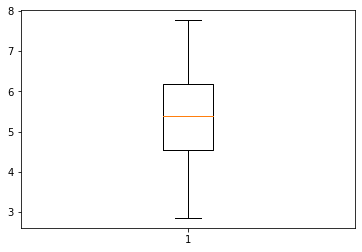

In [15]:
#handling outliers
#Our main feature or we can target feature is Happiness score
plt.boxplot(df['Score'])

In [16]:
#seems like we dont have outliers...so smooth data I got

In [17]:
#now lets try to normalize the data in case its not but it is already normalized...bad luck or good luck. for now its a bad luck

In [19]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [25]:
df['Score'] = std_scale.fit_transform(df[['Score']])

In [26]:
df['Score']

0      2.128711
1      1.976397
2      1.934938
3      1.880862
4      1.875454
         ...   
151   -1.868418
152   -1.961248
153   -1.986484
154   -2.094636
155   -2.301928
Name: Score, Length: 156, dtype: float64

<AxesSubplot:>

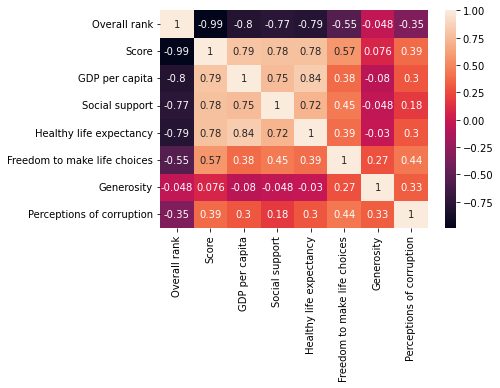

In [29]:
sns.heatmap(df.corr(),annot = True)

In [30]:
# we observe that feature affecting Happiness Score are:
#GDP = 0.79
#Social Support = 0.78
#Healthy life expectancy = 0.78
#try to check with regression analysis how each feature affects the happiness score

<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

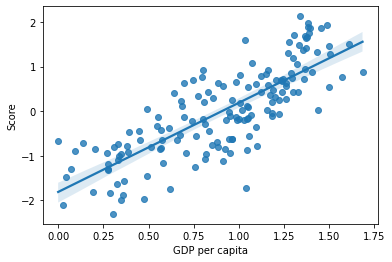

In [32]:
sns.regplot(x='GDP per capita', y='Score',data = df)